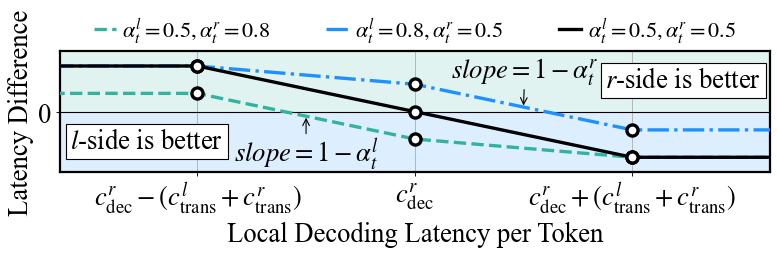

In [173]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib import rcParams

config = {
    "mathtext.fontset":'stix',
}
rcParams.update(config)

font = FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/times.ttf', size=24)
legend_font = FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/times.ttf', size=20)

plt.figure(figsize=(10, 4), dpi=80)
alpha_r = 0.5
alpha_l = 0.5
d_r, rtt = 40, 30
end_points = (-10, 90)
y_ticks = set()

def draw(alpha_l, alpha_r, color, linestyle):
    inflection_points = [
        [end_points[0], (1-alpha_r) * rtt],
        [d_r - rtt, (1-alpha_r) * rtt],
        [d_r, (alpha_l - alpha_r) * rtt],
        [d_r + rtt, (alpha_l - 1) * rtt],
        [end_points[1], (alpha_l - 1) * rtt]
    ]
    for p in inflection_points:
        y_ticks.add(p[1])
    plt.plot(
        *zip(*inflection_points), color=color, lw=3, zorder=10, linestyle=linestyle,
        label=f'$\\alpha^l_t = {alpha_l}, \\alpha^r_t = {alpha_r}$'
    )
    plt.scatter(
        *zip(*inflection_points), color='k', facecolor='white', s=100, zorder=100, linewidths=3
    )

draw(0.5, 0.8, "#33B29E", '--')
draw(0.8, 0.5, "#1E90FF", '-.')
draw(0.5, 0.5, 'k', '-')

plt.ylim([-20, 20])
plt.xlim([end_points[0] + 1, end_points[1] - 1])
plt.xticks(
    [d_r - rtt, d_r, d_r + rtt], ['$c^r_\\text{dec} - (c^l_\\text{trans} + c^r_\\text{trans})$', '$c^r_\\text{dec}$', '$c^r_\\text{dec} + (c^l_\\text{trans} + c^r_\\text{trans})$'], 
    fontproperties=font
)
# plt.yticks(list(y_ticks), ["0" if t == 0 else "" for t in list(y_ticks)], fontproperties=font)
plt.yticks([0], ["0"], fontproperties=font)
plt.text(d_r - 37, - 10 - 2, '$l$-side is better', fontproperties=font, fontsize=24, ha='center', bbox=dict(facecolor='white'))
plt.text(d_r + 37,  10 - 2, '$r$-side is better', fontproperties=font, fontsize=24, ha='center', bbox=dict(facecolor='white'))

plt.annotate(
    '$slope=1-\\alpha^l_t$', xy=(d_r - rtt / 2, -2), xytext=(d_r - rtt * 0.5 - 10, -13 - 3.5),
    arrowprops=dict(arrowstyle='->', lw=1, color='black', shrinkA=0, shrinkB=0, mutation_scale=15), fontproperties=font, fontsize=24
)
plt.annotate(
    '$slope=1-\\alpha^r_t$', xy=(d_r + rtt / 2, 2), xytext=(d_r + rtt * 0.5 - 10, 13 - 2),
    arrowprops=dict(arrowstyle='->', lw=1, color='black', shrinkA=0, shrinkB=0, mutation_scale=15), fontproperties=font, fontsize=24
)
plt.fill_between(end_points, 0, -40, facecolor='#1E90FF', alpha=0.15)
plt.fill_between(end_points, 45, 0, facecolor='#33B29E', alpha=0.15)
plt.hlines(0, end_points[0], end_points[1], color='black', lw=1)
plt.ylabel('Latency Difference', fontproperties=font)
plt.xlabel('Local Decoding Latency per Token', fontproperties=font)
plt.legend(
    prop=legend_font, loc='upper right', bbox_to_anchor=(0.98, 1.45),
    ncol=5, labelspacing=0.2, columnspacing=2.5, 
    frameon=False, handlelength=1, handletextpad=0.3
)
plt.grid(zorder=9)
for frame in plt.gca().spines.values():
    frame.set_linewidth(2)
plt.tight_layout()
plt.savefig('figures/latency_diff.pdf', bbox_inches='tight')
plt.show()